# Massive Yahoo Finance Dataset. Stocks Price Prediction

Title: Stock Prices of 500 Biggest Companies by Market Cap (Last 5 Years)

Description:
This dataset comprises historical stock market data extracted from Yahoo Finance, spanning a period of five years. It includes daily records of stock performance metrics for the top 500 companies based on market capitalization.

Attributes:

    Date: The date corresponding to the recorded stock market data.
    Open: The opening price of the stock on a given date.
    High: The highest price of the stock reached during the trading day.
    Low: The lowest price of the stock observed during the trading day.
    Close: The closing price of the stock on a specific date.
    Volume: The volume of shares traded on the given date.
    Dividends: Any dividend payments made by the company on that date (if applicable).
    Stock Splits: Information regarding any stock splits occurring on that date.
    Company: Ticker symbol or identifier representing the respective company.

## Цель проекта: 
На имеющихся данных запустить самые популярные модели анализа временных рядов и посмотреть,какая из нихболее всего подходит для предсказания цен на акции, чтобы исползовать полученный опыт в дальнейшем.

In [1]:
!pip install catboost
!pip install pmdarima

In [2]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.9.1-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
     ---------------------------------------- 1.0/1.0 MB 1.4 MB/s eta 0:00:00
  Using cached aiohttp-3.9.5-cp39-cp39-win_amd64.whl (371 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.9.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-5.0.2-cp39-cp39-win_amd64.whl (156 kB)
  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp39-cp39-win_amd64.whl (157 kB)
  Using cached pystan-3.4.0-p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

%pylab inline

from catboost import CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Populating the interactive namespace from numpy and matplotlib


In [42]:
df= pd.read_csv('stock_details_5_years.csv')

In [43]:
df.dropna(how='any', axis=0)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


In [44]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [45]:
count = df.isna().sum()
print(count)

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64


In [7]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Company          object
dtype: object

Text(0.5, 1.0, 'Stock Price  over the Years')

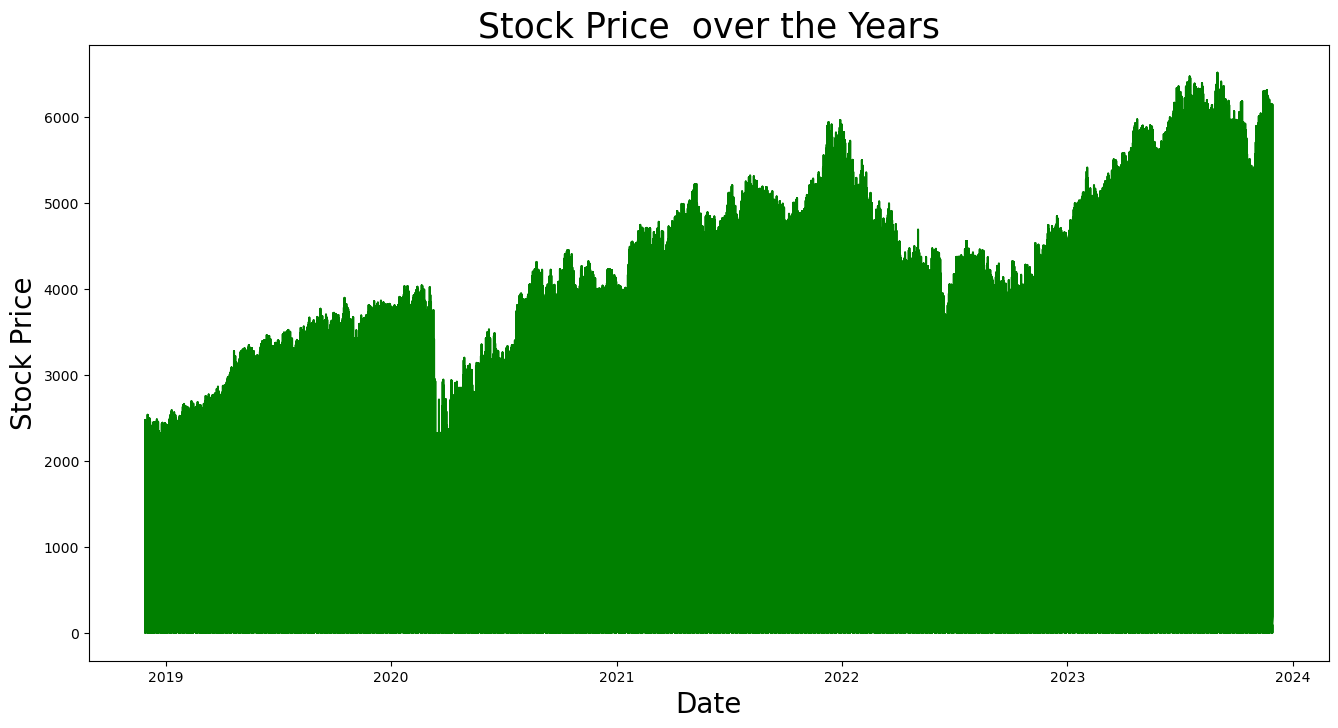

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.index = df['Date'] #????
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price  over the Years',size=25)

### Moving Average

Для модели скользящего среднего нет параметров для настройки GridSearch, но можно оценить разные окна.

In [31]:
from sklearn.metrics import mean_squared_error

best_rmse = float("inf")
best_window = None

for window in range(2, 50):
    df['Predictions'] = df['Close'].rolling(window=window).mean()
    df.dropna(inplace=True)
    rmse = np.sqrt(mean_squared_error(df['Close'][window:], df['Predictions'][window:]))
    if rmse < best_rmse:
        best_rmse = rmse
        best_window = window

print(f'Best Moving Average window: {best_window}, Best Moving Average RMSE: {best_rmse}')

Best Moving Average window: 2, Best Moving Average RMSE: 193.21258986632824


In [34]:
def moving_avg_prediction(df, best_window):
    shape = df.shape[0]
    df_new = df[['Close']]
    
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]
    
    best_window = 2 
    
    print('-----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('-----------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    
    # Compute predictions using the best window
    preds = valid_set['Close'].rolling(window=best_window).mean().dropna().values
    
    # Since rolling mean will reduce the number of predictions by (best_window - 1), we need to adjust for that
    adjusted_valid_set = valid_set.iloc[(best_window - 1):]
    
    rms = np.sqrt(mean_squared_error(adjusted_valid_set['Close'], preds))
    
    print('Best Moving Average window:', best_window)
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    adjusted_valid_set['Predictions'] = preds
    
    plt.plot(train_set['Close'], label='Training Data')
    plt.plot(valid_set['Close'], label='Actual Data')
    plt.plot(adjusted_valid_set['Predictions'], label='Predicted Data')
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Moving Averages', size=20)
    plt.legend()
    plt.show()

-----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------
-----------------------------------------------------------
Shape of Training Set (451339, 1)
Shape of Validation Set (150446, 1)
Best Moving Average window: 2
RMSE value on validation set: 234.98671704526805
-----------------------------------------------------------
-----------------------------------------------------------


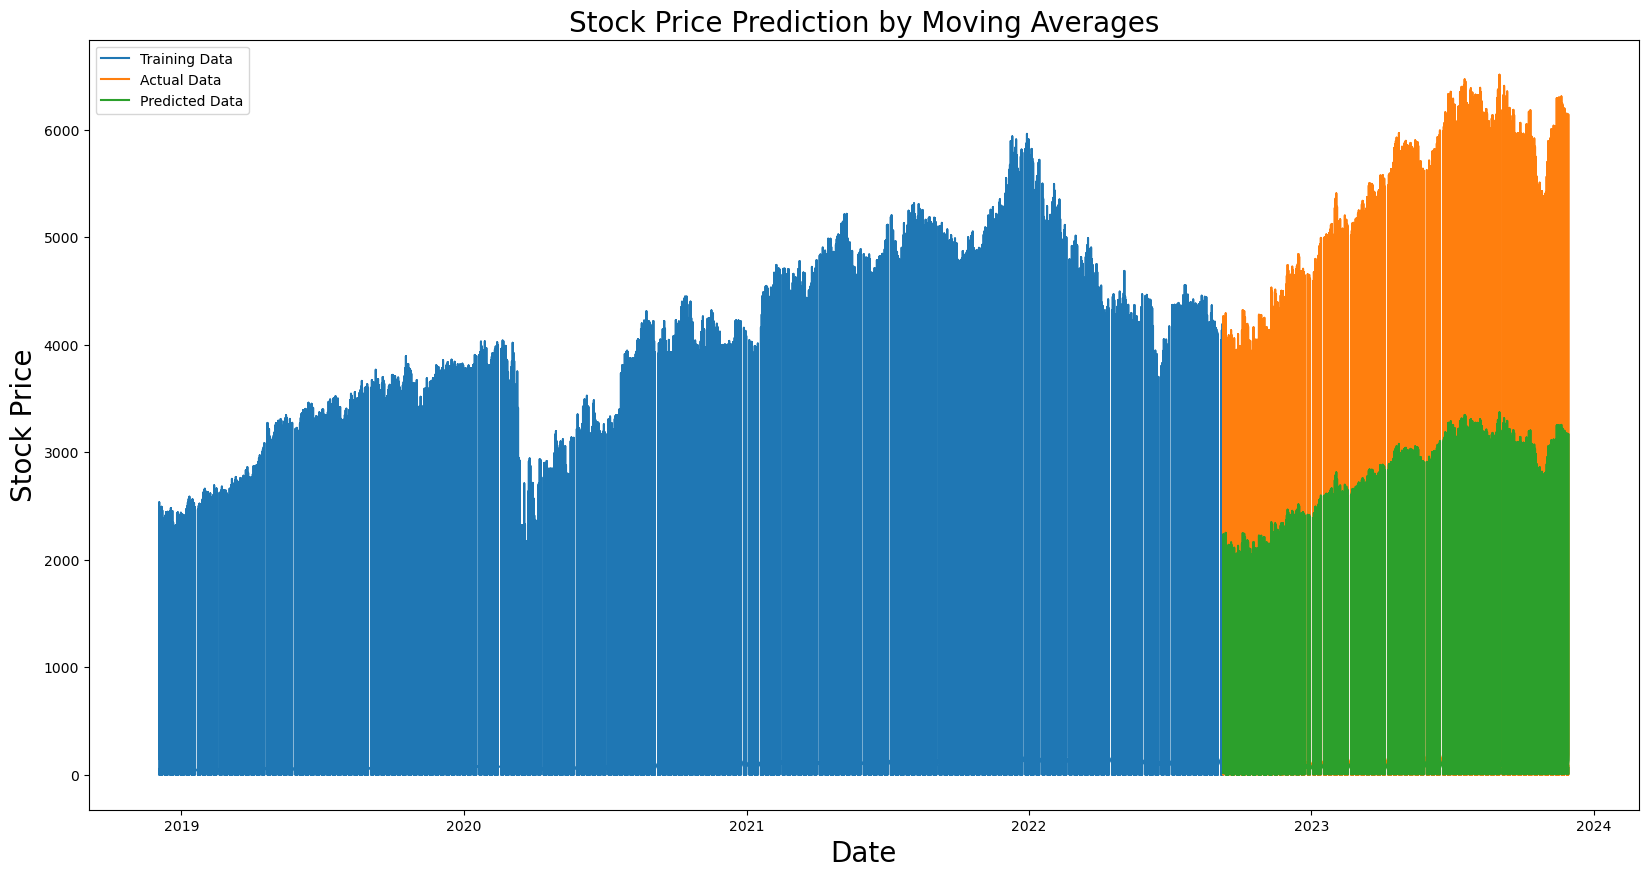

In [36]:
moving_avg_prediction(df, best_window = 2)

### GridSearchCV для Linear Regression

In [ ]:
# Преобразование строковых дат в объекты datetime
df['Date'] = pd.to_datetime(df['Date'])

# Преобразование дат в числовые значения
df['Date'] = df['Date'].map(dt.datetime.toordinal)

# Объединение обучающей и валидационной выборки для GridSearchCV
x = df['Date'].values.reshape(-1, 1)
y = df['Close'].values.reshape(-1, 1)

# TimeSeriesSplit для кросс-валидации временных рядов
tscv = TimeSeriesSplit(n_splits=5)

In [51]:
from sklearn.linear_model import Ridge

param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

grid_ridge = GridSearchCV(Ridge(), param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_ridge.fit(x, y)

print(f'Best Ridge Regression score: {np.sqrt(-grid_ridge.best_score_)}')
print(f'Best Ridge Regression parameters: {grid_ridge.best_params_}')

Best Ridge Regression score: 290.31890811432856
Best Ridge Regression parameters: {'alpha': 0.1}


### Linear Regression

In [52]:
from math import ceil
import datetime as dt

def linear_regression_prediction(df):
    # Преобразование 'Date' столбца в datetime64 и удаление информации о временной зоне
    df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)
    
    shape = df.shape[0]
    df_new = df[['Date', 'Close']]
    
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]
    
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY RIDGE REGRESSION-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)
    
    train = train_set.reset_index(drop=True)
    valid = valid_set.reset_index(drop=True)
    
    # Преобразуем даты в числовые значения
    x_train = train['Date'].map(dt.datetime.toordinal).values.reshape(-1, 1)
    y_train = train['Close'].values.reshape(-1, 1)
    x_valid = valid['Date'].map(dt.datetime.toordinal).values.reshape(-1, 1)
    y_valid = valid['Close'].values.reshape(-1, 1)
      
    best_ridge_model = grid_ridge.best_estimator_
    preds = best_ridge_model.predict(x_valid)
    
    rms = np.sqrt(np.mean(np.power((y_valid - preds), 2)))
    print(f'Ridge Regression score: {rms}')
    print(f'Best Ridge Regression parameters: {grid_ridge.best_params_}')
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'], label='Train Set')
    plt.plot(valid_set[['Close']], label='Validation Set')
    plt.plot(valid_set['Predictions'], label='Predictions')
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Ridge Regression', size=20)
    plt.legend(['Train Set', 'Validation Set', 'Predictions'])
    plt.show()

In [25]:
from math import ceil
import datetime as dt

def linear_regression_prediction(df):
    # Преобразование 'Date' столбца в datetime64 и удаление информации о временной зоне
    df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)
    
    shape = df.shape[0]
    df_new = df[['Date', 'Close']]
    
    train_set = df_new.iloc[:ceil(shape * 0.75)]
    valid_set = df_new.iloc[ceil(shape * 0.75):]
    
        
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)
    
    train = train_set.reset_index(drop=True)
    valid = valid_set.reset_index(drop=True)
    
    # Преобразуем даты в числовые значения
    x_train = train['Date'].map(dt.datetime.toordinal).values.reshape(-1, 1)
    y_train = train['Close'].values.reshape(-1, 1)
    x_valid = valid['Date'].map(dt.datetime.toordinal).values.reshape(-1, 1)
    y_valid = valid['Close'].values.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    
    rms = np.sqrt(np.mean(np.power((y_valid - preds), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'], label='Train Set')
    plt.plot(valid_set[['Close']], label='Validation Set')
    plt.plot(valid_set['Predictions'], label='Predictions')
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Linear Regression', size=20)
    plt.legend(['Train Set', 'Validation Set', 'Predictions'])
    plt.show()

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY RIDGE REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set: (452222, 2)
Shape of Validation Set: (150740, 2)
Ridge Regression score: 333.8728089746549
Best Ridge Regression parameters: {'alpha': 0.1}
-----------------------------------------------------------
-----------------------------------------------------------


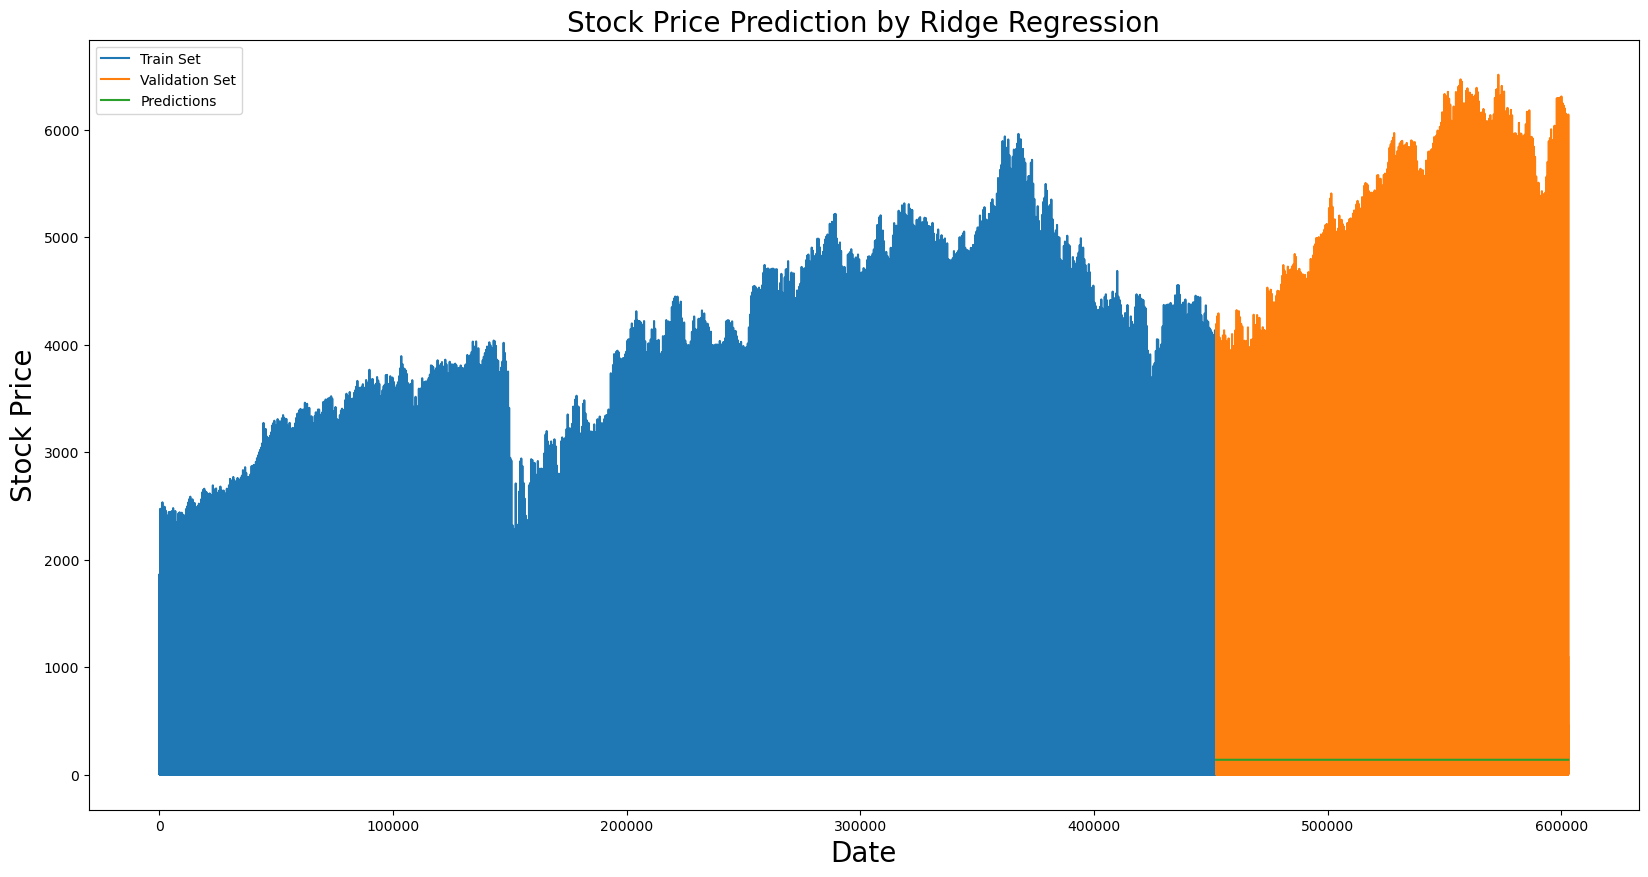

In [53]:
linear_regression_prediction(df)

### GridSearchCV для K-Nearest Neighbours

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_knn.fit(x, y)

print(f'Best KNN params: {grid_knn.best_params_}, Best KNN score: {np.sqrt(-grid_knn.best_score_)}')


### K-Nearest Neighbours

In [35]:
def k_nearest_neighbours_predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-------------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-------------------------------------------------------------------
Shape of Training Set (452222, 1)
Shape of Validation Set (150740, 1)
RMSE value on validation set: 364.7502869850776
-----------------------------------------------------------
-----------------------------------------------------------


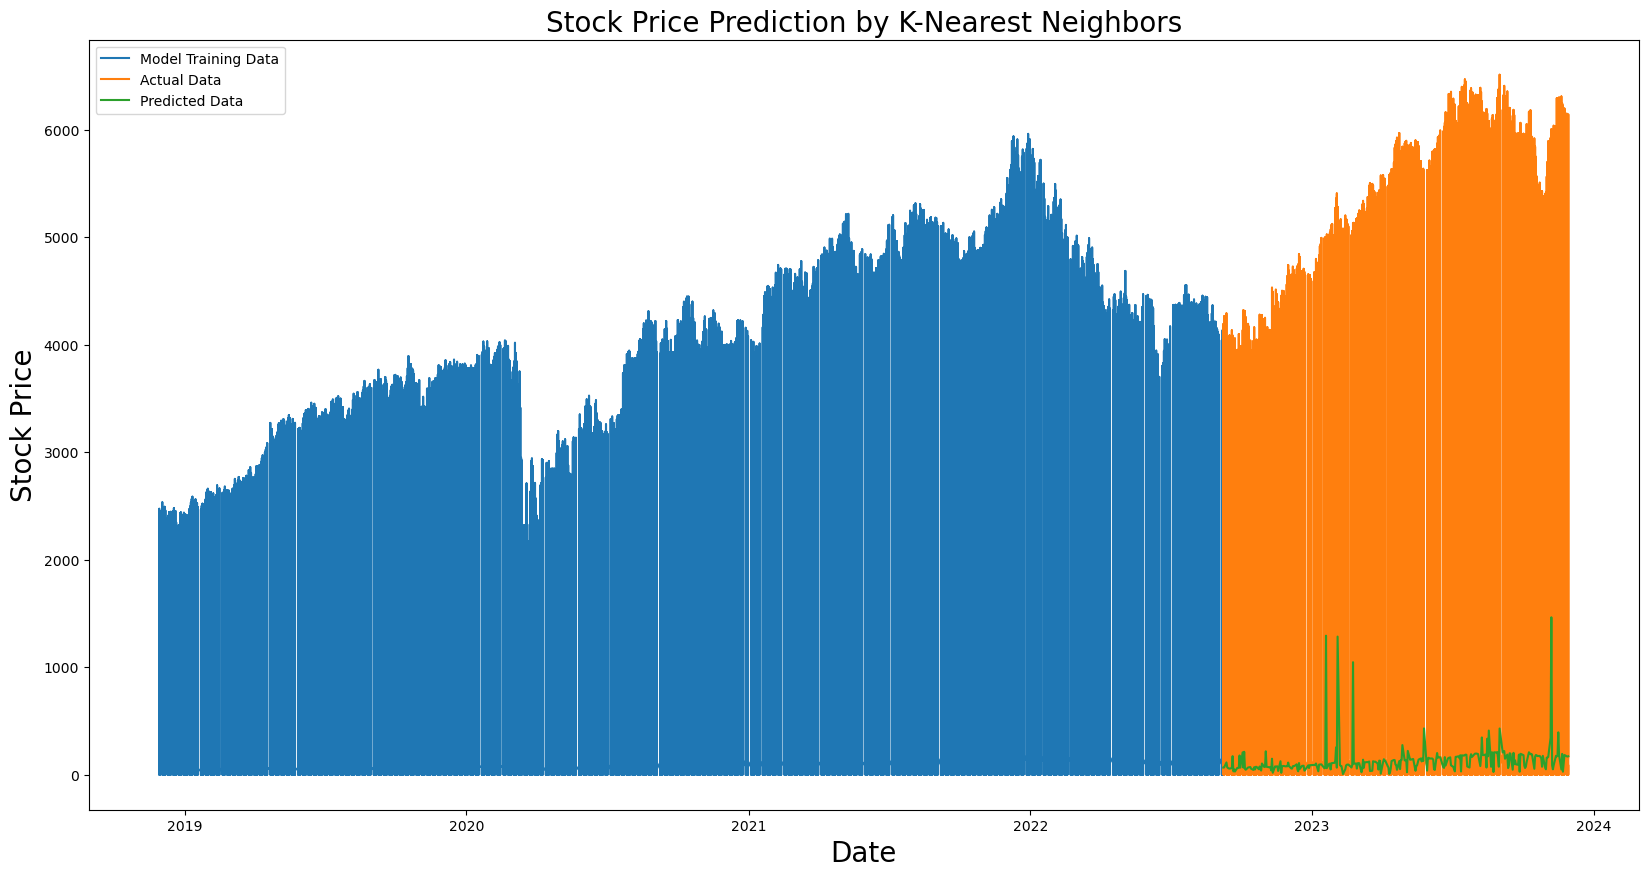

In [7]:
k_nearest_neighbours_predict(df)

### Auto ARIMA

Подберем параметры для модели

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = ARIMA(df['Close'], order=param, seasonal_order=param_seasonal)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
        except:
            continue

print(f'Best ARIMA params: {best_params}, Best ARIMA AIC: {best_aic}')


In [9]:
def auto_arima_prediction(df):
    shape = df.shape[0]
    df_new = df
    data = df_new.sort_index(ascending=True, axis=0)
    train_set = data[:ceil(shape * 0.75)]
    valid_set = data[ceil(shape * 0.75):]
    
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------')
    print('----------------------------------------------------------')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)
    
    training = train_set['Close']
    validation = valid_set['Close']
    
    # Оптимизированные параметры модели
    model = auto_arima(training, start_p=1, start_q=1, max_p=2, max_q=2, m=1,
                       start_P=0, seasonal=False, d=1, D=1, trace=True,
                       error_action='ignore', suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=len(valid_set))
    forecast = pd.DataFrame(forecast, index=valid_set.index, columns=['Prediction'])
    
    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Close']) - np.array(forecast['Prediction'])), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    
    plt.plot(train_set['Close'], label='Train Set')
    plt.plot(valid_set['Close'], label='Validation Set')
    plt.plot(forecast['Prediction'], label='Predictions')
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Auto ARIMA', size=20)
    plt.legend(['Train Set', 'Validation Set', 'Predictions'])
    plt.show()

----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------
----------------------------------------------------------
Shape of Training Set: (452222, 9)
Shape of Validation Set: (150740, 9)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=162.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6592352.848, Time=6.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6458343.773, Time=8.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=131.97 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6592350.848, Time=3.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6410179.624, Time=11.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=386.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6410177.624, Time=6.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6458341.773, Time=4.52 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=322.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC

C:\Users\shevr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE value on validation set: nan
-----------------------------------------------------------


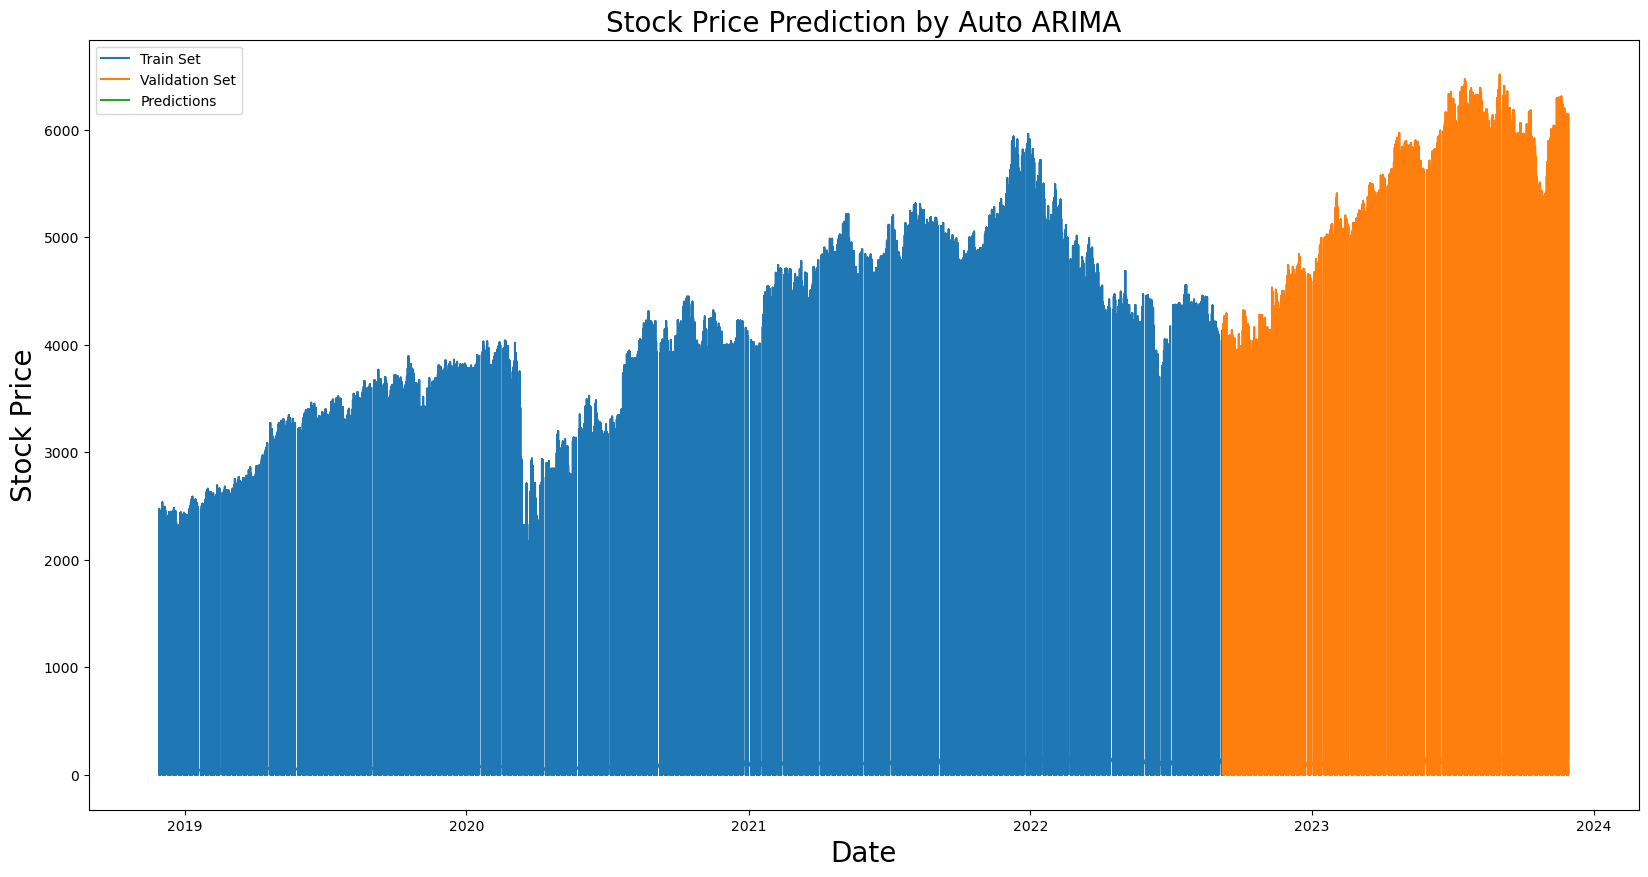

In [10]:
 auto_arima_prediction(df)

### GridSearchCV для LSTM и GRU

In [ ]:
model_lstm = KerasRegressor(build_fn=create_lstm_model, verbose=0)
model_gru = KerasRegressor(build_fn=create_gru_model, verbose=0)

param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

tscv = TimeSeriesSplit(n_splits=3)

grid_lstm = GridSearchCV(estimator=model_lstm, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_gru = GridSearchCV(estimator=model_gru, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')

grid_lstm.fit(x, y)
grid_gru.fit(x, y)

print(f'Best LSTM params: {grid_lstm.best_params_}, Best LSTM score: {np.sqrt(-grid_lstm.best_score_)}')
print(f'Best GRU params: {grid_gru.best_params_}, Best GRU score: {np.sqrt(-grid_gru.best_score_)}')


### Long Short Term Memory (LSTM)

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

def lstm_prediction(df):
    shape = df.shape[0]
    df_new = df[['Close']]
    df_new.head()
    dataset = df_new.values
    train = df_new[:ceil(shape*0.75)]
    valid = df_new[ceil(shape*0.75):]
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    print('Shape of Training Set', train.shape)
    print('Shape of Validation Set', valid.shape)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(60, len(train)):
        x_train.append(scaled_data[i-60:i, 0])
        y_train.append(scaled_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    
    # Используем Adam оптимизатор с learning rate
    optimizer = Adam(learning_rate=0.001)  # или lr=0.001, в зависимости от версии Keras/TensorFlow
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)
    
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    rms = np.sqrt(np.mean(np.power((valid - closing_price), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])
    plt.show()

-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (452222, 1)
Shape of Validation Set (150740, 1)
Epoch 1/10
14131/14131 - 367s - 26ms/step - loss: 0.0015
Epoch 2/10
14131/14131 - 371s - 26ms/step - loss: 0.0015
Epoch 3/10
14131/14131 - 367s - 26ms/step - loss: 0.0014
Epoch 4/10
14131/14131 - 367s - 26ms/step - loss: 6.9448e-04
Epoch 5/10
14131/14131 - 3966s - 281ms/step - loss: 6.9403e-04
Epoch 6/10
14131/14131 - 362s - 26ms/step - loss: 3.8412e-04
Epoch 7/10
14131/14131 - 364s - 26ms/step - loss: 2.7662e-04
Epoch 8/10
14131/14131 - 364s - 26ms/step - loss: 2.6620e-04
Epoch 9/10
14131/14131 - 365s - 26ms/step - loss: 2.6744e-04
Epoch 10/10
14131/14131 - 366s - 26ms/step - loss: 1.6119e-04
4711/4711 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step
RMSE value on validation set: Close    144.610074
d

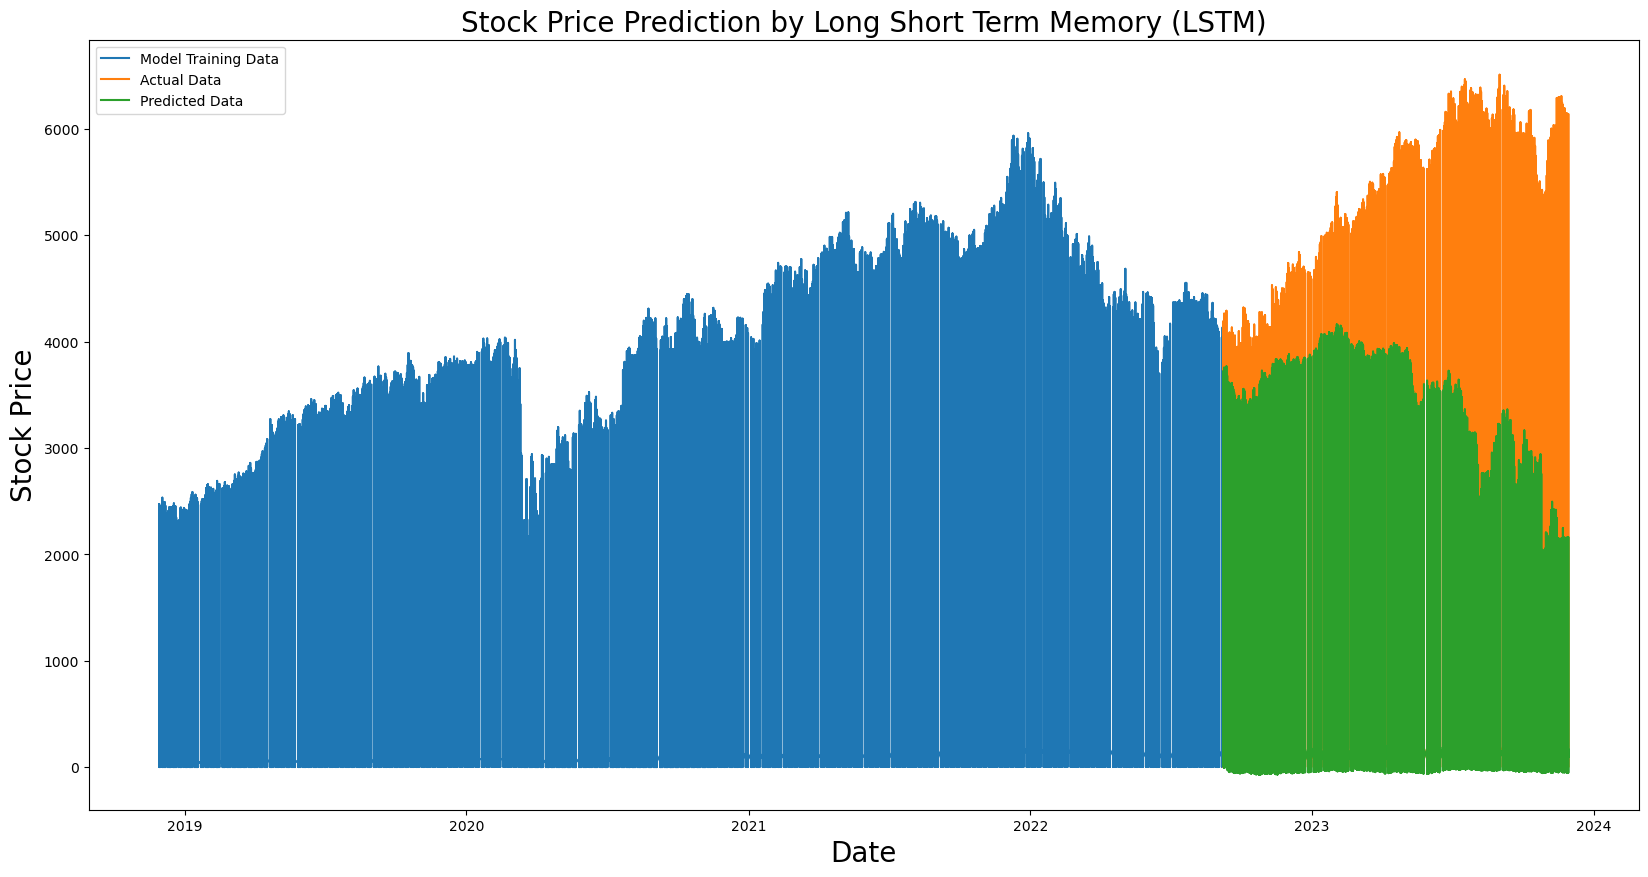

In [23]:
lstm_prediction(df)

### Выводы:
    На датасете лучше всего себя проявила модель LSTM. не исключено, что для улучшения качества остальных моделей следует иначе задать исходные параметры,возможно, тогда предсказание будет точнее. 